In [1]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\rajan\Downloads\occupancy_data\datatest.txt")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


In [3]:
data.drop(["date"],axis=1,inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    2665 non-null   float64
 1   Humidity       2665 non-null   float64
 2   Light          2665 non-null   float64
 3   CO2            2665 non-null   float64
 4   HumidityRatio  2665 non-null   float64
 5   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 145.7 KB


In [5]:
data.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,2665.0,21.433876,1.028024,20.200000,20.650000,20.890000,22.356667,24.408333
Humidity,2665.0,25.353937,2.436842,22.100000,23.260000,25.000000,26.856667,31.472500
Light,2665.0,193.227556,250.210906,0.000000,0.000000,0.000000,442.500000,1697.250000
CO2,2665.0,717.906470,292.681718,427.500000,466.000000,580.500000,956.333333,1402.250000
HumidityRatio,2665.0,0.004027,0.000611,0.003303,0.003529,0.003815,0.004532,0.005378
Occupancy,2665.0,0.364728,0.481444,0.000000,0.000000,0.000000,1.000000,1.000000


In [7]:
data_copy = data.copy(deep = True)
data_copy[['Light']] = data_copy[['Light']].replace(0,np.NaN)

## showing the count of Nans
print(data_copy.isnull().sum())

Temperature         0
Humidity            0
Light            1615
CO2                 0
HumidityRatio       0
Occupancy           0
dtype: int64


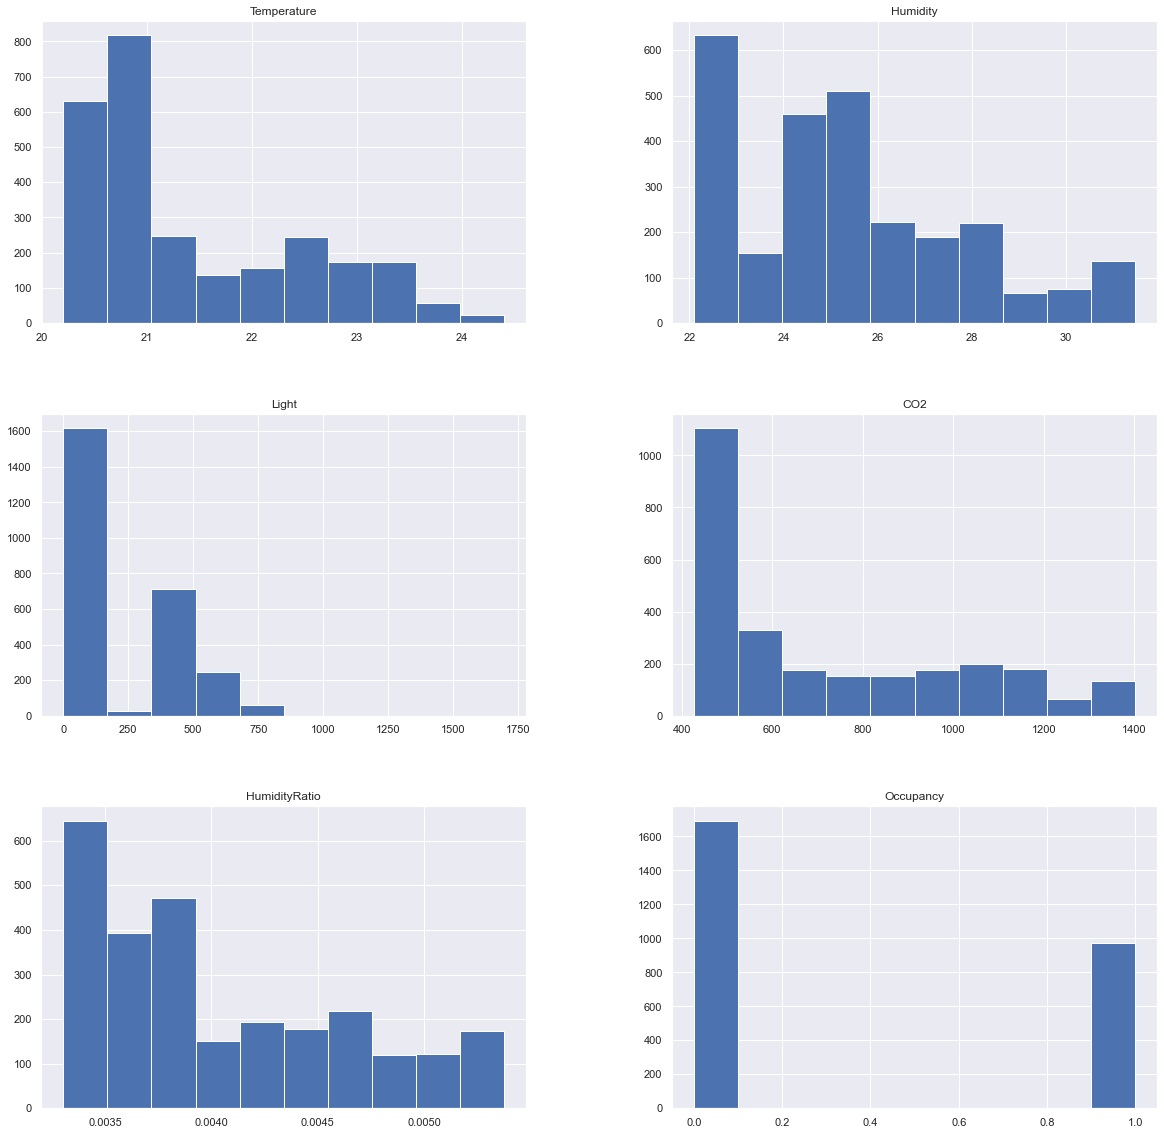

In [8]:
p = data.hist(figsize = (20,20))

In [9]:
data_copy['Light'].fillna(data_copy['Light'].mean(), inplace = True)

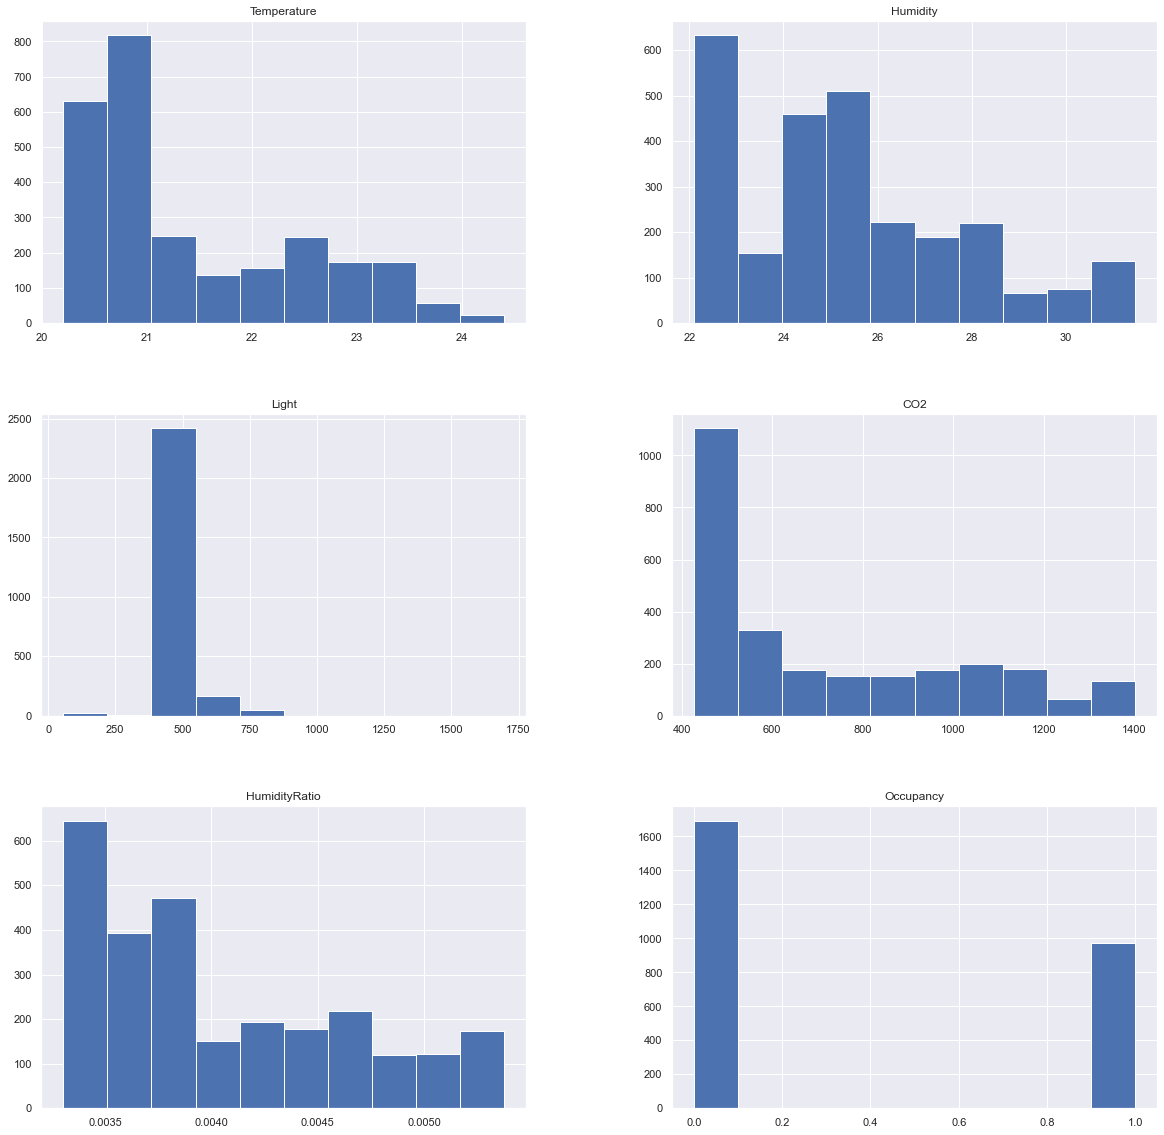

In [10]:
p = data_copy.hist(figsize = (20,20))

In [11]:
data.shape

(2665, 6)

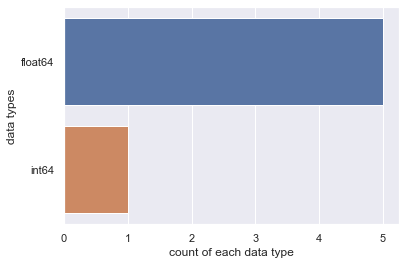

In [12]:
sns.countplot(y=data.dtypes ,data=data)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

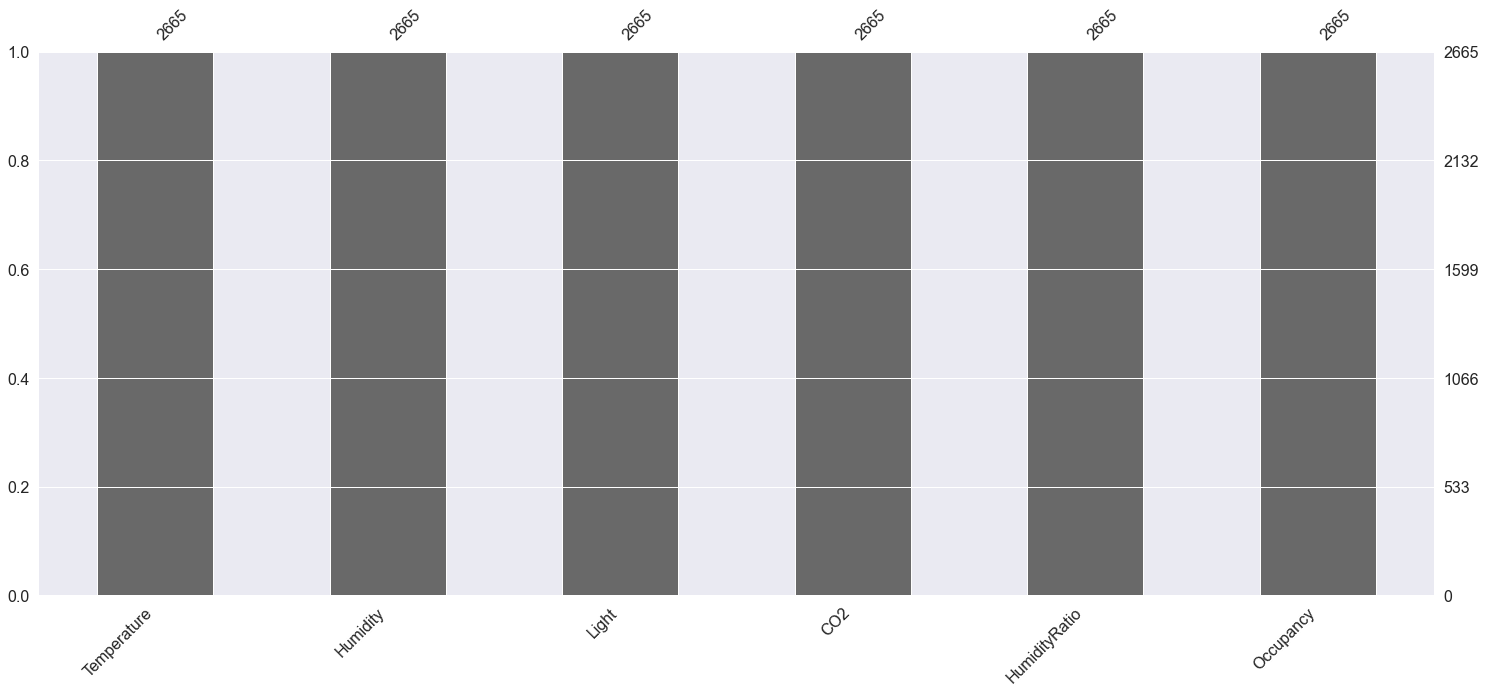

In [13]:
import missingno as msno
p=msno.bar(data)

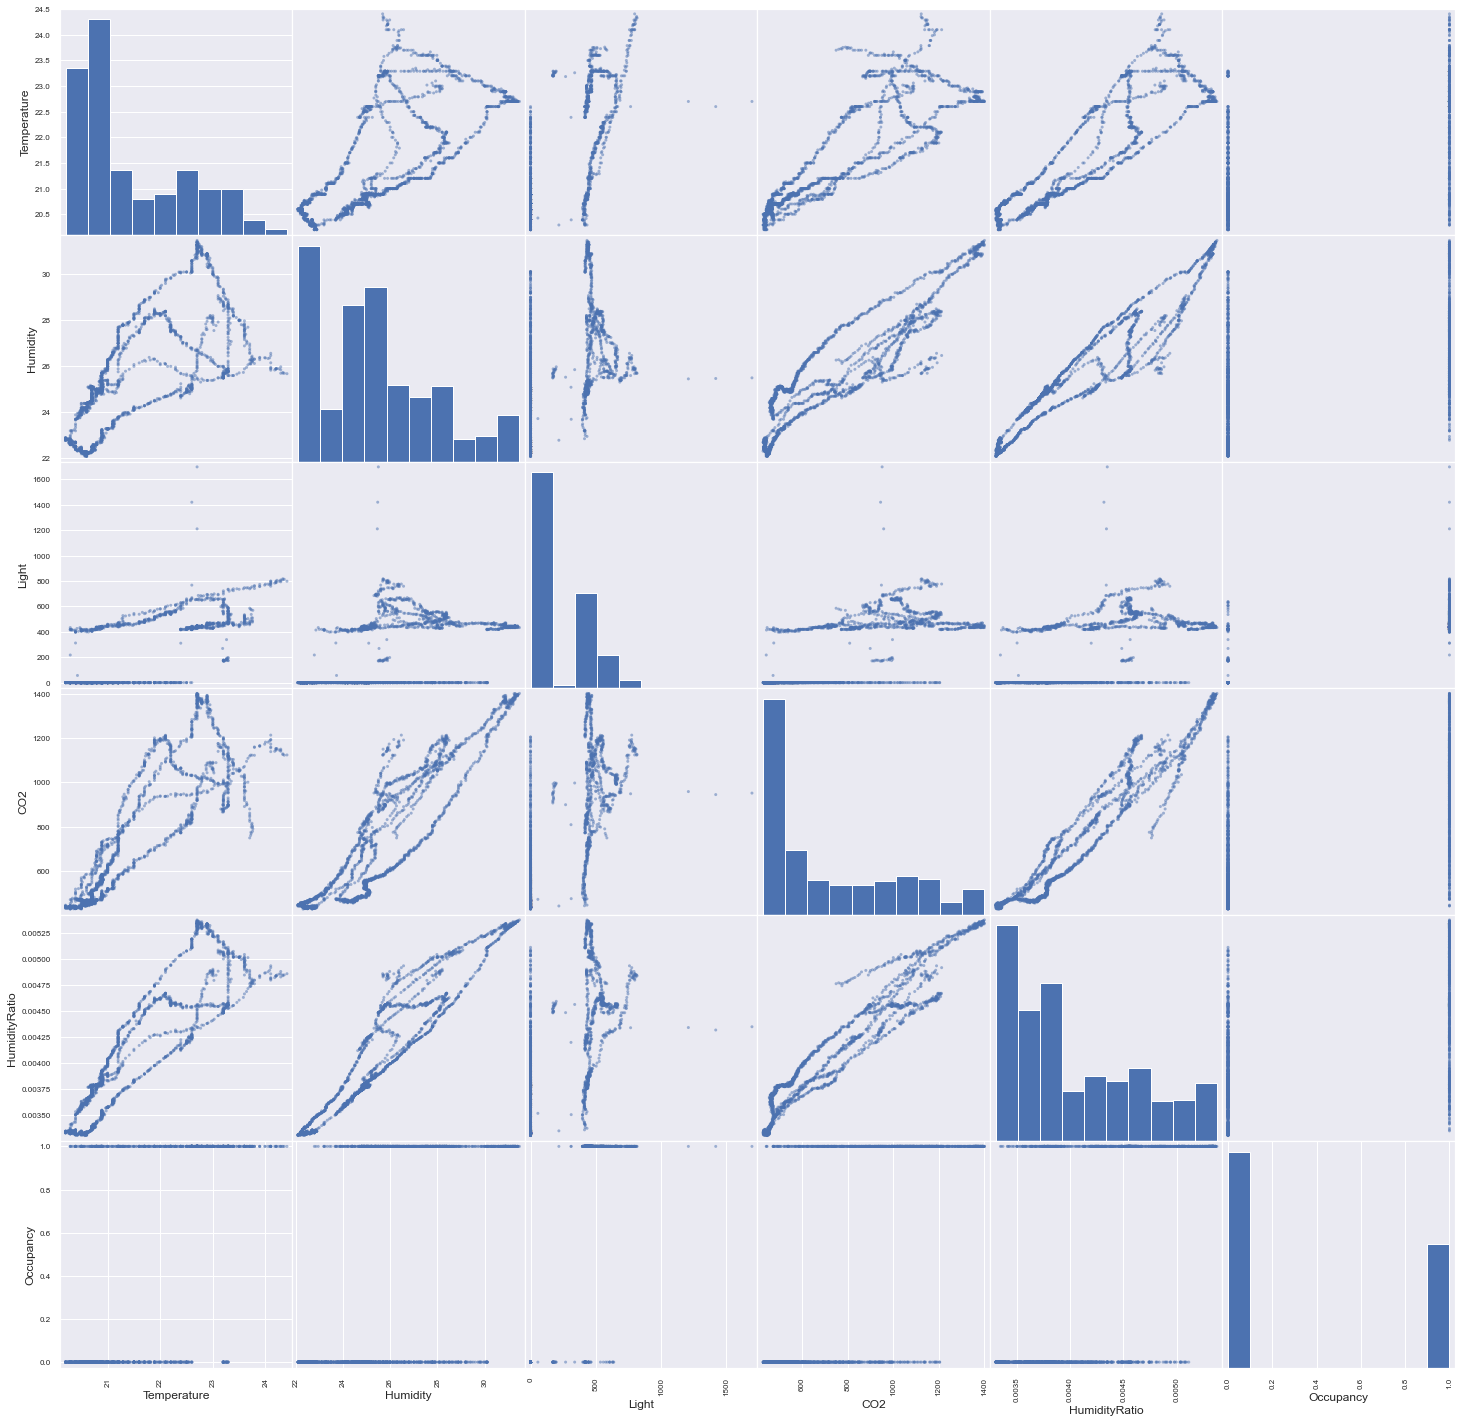

In [14]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(data,figsize=(25, 25))

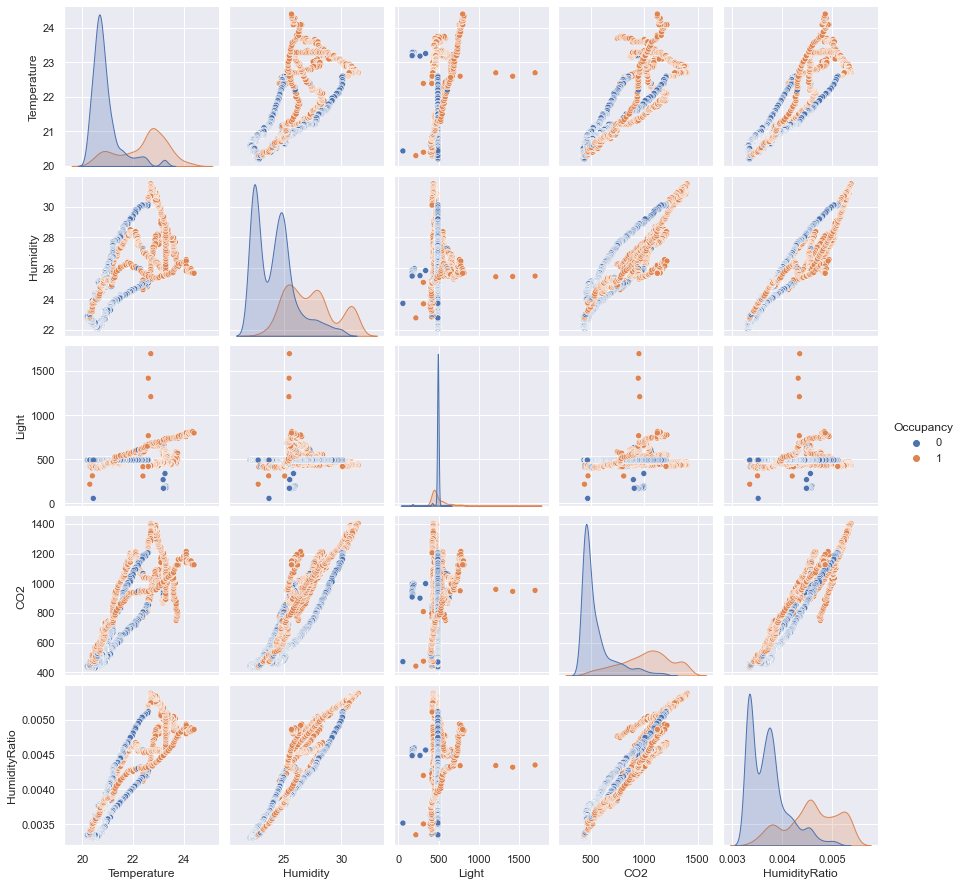

In [15]:
p=sns.pairplot(data_copy, hue = 'Occupancy')

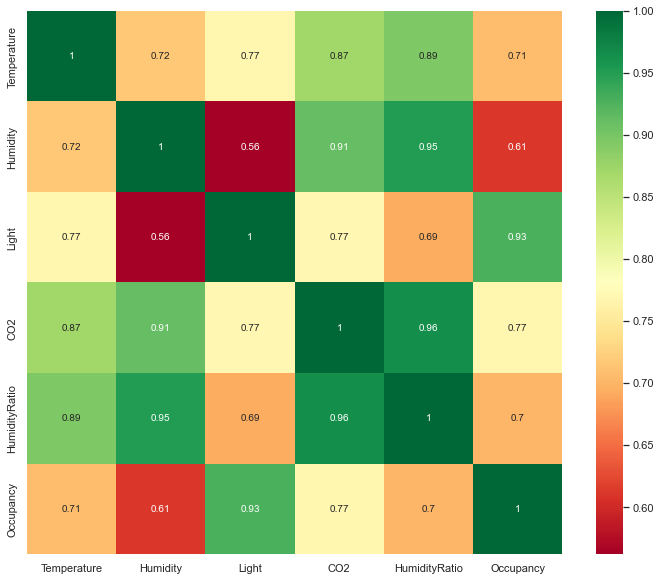

In [16]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')

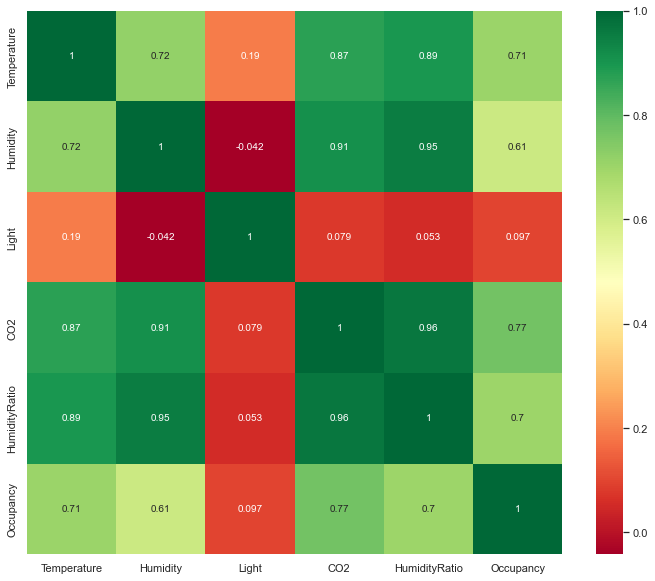

In [17]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(data_copy.corr(), annot=True,cmap ='RdYlGn') 

In [18]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(data_copy.drop(["Occupancy"],axis = 1),),
        columns=['Temperature','Humidity', 'Light', 'CO2',
       'HumidityRatio'])

In [19]:
X.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
0,2.204762,0.376814,1.320036,0.106940,1.207540
1,2.222275,0.384202,1.225320,0.145214,1.221461
2,2.233950,0.359575,1.145461,0.176881,1.209161
3,2.226653,0.316478,0.046245,0.194253,1.174140
4,2.257300,0.347262,-0.025489,0.208776,1.211522


In [20]:
y = data_copy.Occupancy

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [22]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [23]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Train Accuracy {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Train Accuracy 100.0 % and k = [1]


In [24]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Test Accuracy {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Test Accuracy 98.87514060742407 % and k = [1]


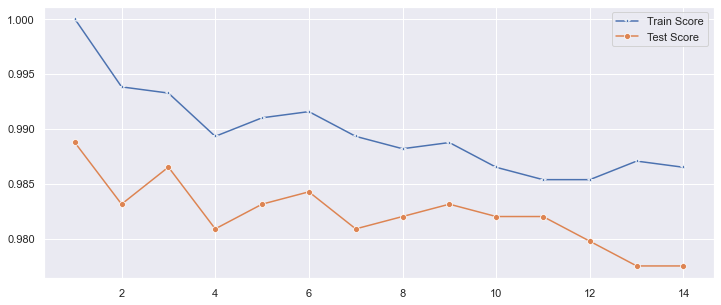

In [25]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [26]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9820022497187851